## PROBABILITY AND STATISTICS 1:2 ##
## REMEDIAL ASSIGNMENT 4 MARKING GUIDE: 30 MARKS ##
* The codes used in this marking guide are not strictly the only way to answer the questions and alternative correct codes/graphs will be awarded marks
* Marks are awarded not just for results but for explanations too
* Notebooks with no names will not be graded
* The marking guide uses the dataset "Assignment 4_Remedial.csv"

## Q1: It is believed that variables "BMI" and "AgeCategory" are key indicators of "KidneyDisease". Is this true? [9 MARKS]

**A. Import libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import chi2_contingency
import association_metrics as am

**B. Import dataset as a pandas dataframe called "Assignment4"**

In [2]:
Assignment4 = pd.read_csv("Assignment 4_Remedial.csv")
#view dataframe information (shape and datatypes)
Assignment4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

* The dataframe has 319795 samples and 17 variables (14 categorical, 4 continuous), and no missing data

**C. Check relationship between BMI, AgeCategory and KidneyDisease**
* BMI and KidneyDisease: Boxplots and ANOVA test
* AgeCategory and KidneyDisease: Grouped bar plots/count plots and chisquare test

**i) Relationship with continuous variable BMI**

In [ ]:
#Generate boxplot
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='KidneyDisease', y='BMI', data=Assignment4, color='#99c2a2')
ax = sns.swarmplot(x="KidneyDisease", y="BMI", data=Assignment4, color='#7d0013')
plt.show()

In [4]:
# Defining a function to find the statistical relationship using ANOVA
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [5]:
#Calling the function 
CategoricalPredictorList=['KidneyDisease']
FunctionAnova(inpData=Assignment4, 
              TargetVariable='BMI', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

KidneyDisease is correlated with BMI | P-Value: 1.7223211696873607e-181


['KidneyDisease']

Another way to carry out an ANOVA test is to use the statsmodels library, which allows you to specify a model with a formula syntax that mirrors that used by the R programming language. R users may find this method more familiar:
- ols("outcome_variable ~ C(independent_variable)", data= data_frame).fit()
- The independent variable can be replaced by the categorical variable

In [14]:
#Libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
#Alternative way to compute ANOVA
# Ordinary Least Squares (OLS) model
model = ols('BMI ~ C(KidneyDisease)', data=Assignment4).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
#print results
anova_table


,sum_sq,df,F,PR(>F)
C(KidneyDisease),3.329844e+04,1.0,826.345832,1.722321e-181
Residual,1.288638e+07,319793.0,NaN,NaN


In [ ]:
#Alternative ANOVA using bioinfokit library
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=Assignment4, res_var='BMI', anova_model='BMI ~ KidneyDisease')
res.anova_summary

**ii) Relationship with categorical variable "AgeCategory"**

In [6]:
#Generate a cross-tabulation between the variables
CrosstabResult=pd.crosstab(Assignment4['KidneyDisease'], Assignment4['AgeCategory'])
print(CrosstabResult)

AgeCategory    18-24  25-29  30-34  35-39  40-44  45-49  50-54  55-59  60-64  \
KidneyDisease                                                                  
No             20932  16840  18589  20294  20640  21340  24682  28759  32314   
Yes              132    115    164    256    366    451    700    998   1372   

AgeCategory    65-69  70-74  75-79  80 or older  
KidneyDisease                                    
No             32462  29095  19883        22186  
Yes             1689   1970   1599         1967  


In [7]:
#Then run a chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(CrosstabResult)

# Then let us print the results
print("Chi-square value is equal to :", chi2_stat)
print("The P-value is equal to :", p_value)

Chi-square value is equal to : 5198.262597867459
The P-value is equal to : 0.0


    Final Answer: 
- Null Hypothesis for Chisquare test:
- H0: There is no significant correlation between AgeCategory and KidneyDisease.
- Chisquare = 5198.26, p-value=0.0 (p<0.05) accept null hypothesis that no significant relationship between KidneyDisease and AgeCategory    
- Therefore, only BMI is a key indicator of KidneyDisease

## Q2: Explain the distribution of probability of any continuous variable [5 MARKS]

- Use probability density function (PDF): gives the probability density at a specific point or interval for a continuous random variable.  
- Formula for PDF: 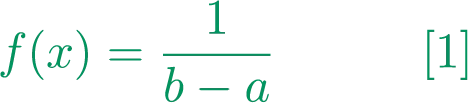
- Where: a is the minimum value in the range,
- b is the maximum value, and b>a
- Therefore
- Use cumulative density function (CDF): gives the probability that a random variable is less than or equal to a specific value.It provides a cumulative view of the probability distribution
- Formula for CDF: 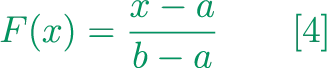
- Above formula derived by intergrating formula for PDF: 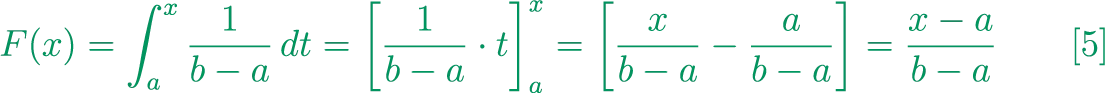
- Where x is any specified value from the interval, for example BMI of 34.5:
- Substituting x with 34.5 in the CDF formul: F(34.5)=(34.5−12.02​)/(94.85−12.02)=0.271.



In [17]:
#Generate maximum and mimimum of the variable of interest "BMI"
print("The maximum of BMI is: ", Assignment4["BMI"].max())
print("The minimum BMI is: ", Assignment4["BMI"].min())

The maximum of BMI is:  94.85
The minimum BMI is:  12.02


In [21]:
#Long way to calculate CDF and PDF using the formulae for a BMI of 34.5
from scipy.stats import uniform

# Define the parameters of the uniform distribution
a = 12.02 # Lower bound
b = 94.85 # Upper bound

# Calculate the CDF & PDF for x=34.5
x = 34.5
cdf_value = uniform.cdf(x, loc=a, scale=(b-a))

pdf_value = uniform.pdf(x, loc=a, scale=(b-a))

# Print the results
print(f"The CDF for BMI of 34.5 in the uniform distribution is: {cdf_value}")

print(f"The PDF for BMI of 34.5 in the uniform distribution is: {pdf_value}")

The CDF for BMI of 34.5 in the uniform distribution is: 0.2713992514789328
The PDF for BMI of 34.5 in the uniform distribution is: 0.012072920439454304


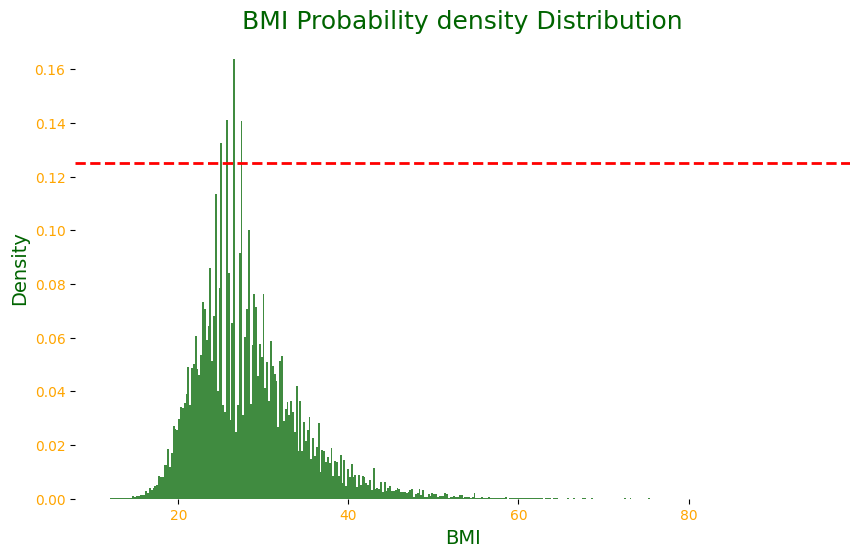

In [15]:
#Visualise distribution of variable "BMI"
plt.figure(figsize=(10, 6))

# Plot the histogram for BMI
sns.histplot(Assignment4["BMI"], kde=False, color='darkgreen', stat='density', linewidth=0)

# Adding a horizontal line at y=1/8 (12.5% probability)
plt.axhline(1 / 8, color="red", linestyle='--', linewidth=2)

# Remove left and bottom spines to eliminate the box just for better visual
sns.despine(left=True, bottom=True)

# Set labels and title
plt.xlabel("BMI", fontsize=14, color='darkgreen')
plt.ylabel("Density", fontsize=14, color='darkgreen')  
plt.title("BMI Probability density Distribution", fontsize=18, color='darkgreen')

# Set the color of tick labels on both axes
plt.xticks(color='orange')
plt.yticks(color='orange')

# Display the plot
plt.show()

Now, we will compute the Cumulative Distribution Function (CDF) and Probability Density Function (PDF) using the uniform.cdf and uniform.pdf functions, respectively.

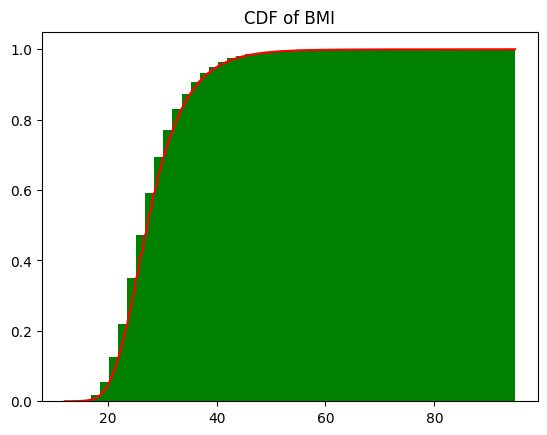

In [18]:
#CDF of the variable BMI
plt.hist(Assignment4.BMI,bins=50,label='BMI',color="green",cumulative = True,density=True, stacked=True)
sorted_data = np.sort(Assignment4.BMI)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,y,color='red')
plt.title('CDF of BMI')
plt.show()

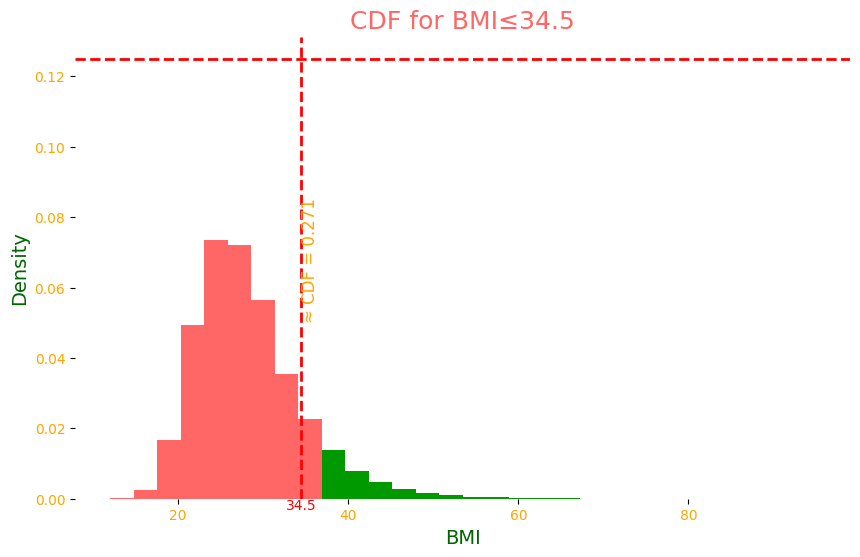

In [22]:
#Plotting the CDF for an x value of 34.5
#In otherwords, probability of BMI of 34.5
plt.figure(figsize=(10, 6))

# extracting BMI column and the value of interest 34.5
BMI_data = Assignment4["BMI"]
highlight_value = 34.5

# Create bins and assigning histogram values
hist_values, bin_edges = np.histogram(BMI_data, bins=30, density=True)

# Plot histogram bars & color respective bars
for edge, value in zip(bin_edges[:-1], hist_values):
    if edge <= highlight_value:
        color = '#FF6666' #red
    else:
        color = '#009900' #green
    plt.bar(edge, value, width=np.diff(bin_edges)[0], color=color, alpha=1, align='edge', edgecolor='none')

# Highlight the value 34.5 with a red dashed line
plt.axvline(highlight_value, color='red', linestyle='--', linewidth=2)

# Add a horizontal line at y=1/8 (12.5% probability)
plt.axhline(1 / 8, color="red", linestyle='--', linewidth=2)

#Add 2.32 label on X axis to indicate x value
plt.text(highlight_value, 0, str(highlight_value), color='red', ha='center', va='top', fontsize=10)

# Add a text annotation for CDF value at x ≤ 34.5
plt.text(highlight_value, 0.05, "≈ CDF = 0.271", color='orange', ha='left', va='bottom', fontsize=12, rotation='vertical')


# Remove left and bottom spines to eliminate the box just for better visual
sns.despine(left=True, bottom=True)

# Set labels and title
plt.xlabel("BMI", fontsize=14, color='darkgreen')
plt.ylabel("Density", fontsize=14, color='darkgreen') 
plt.title("CDF for BMI≤34.5", fontsize=18, color='#FF6666')

# Set the color of tick labels on both axes
plt.xticks(color='orange')
plt.yticks(color='orange')

# Display the plot
plt.show()

- It indicates that there is a probability of around 27.1% that a randomly chosen individual would have a BMI of 34.5.
- The probability density at BMI of 34.5 is 0.0120 or 1.2%

- What is the probability of a higher BMI like 43 and over?
- Formula: P(X≥ 43)=1−P(X< 43)
- P(X≥ 43) =1- ((43−12.02​)/(94.85−12.02))= 1 - 0.374 = 0.626 or 62.6%


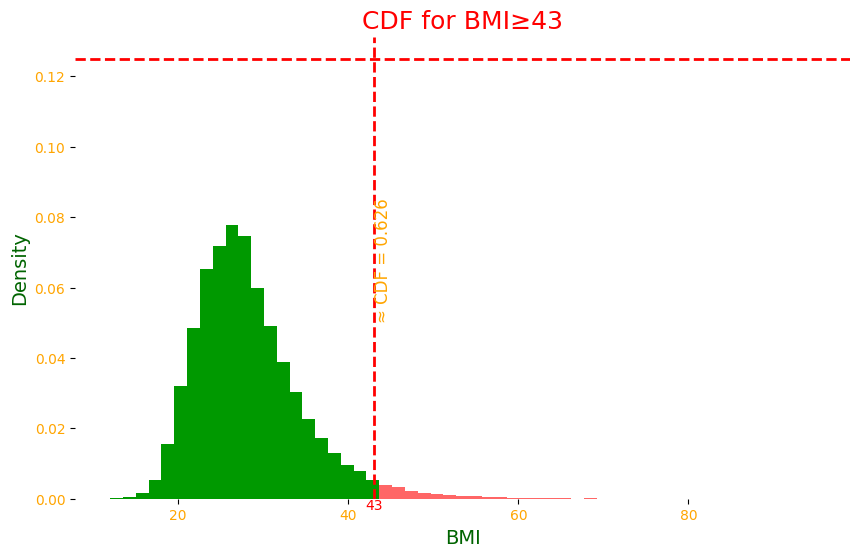

In [24]:
#Plotting the above
plt.figure(figsize=(10, 6))

# extracting BMI column and value of interest
BMI_data = Assignment4["BMI"]
highlight_value = 43

# Create bins and assigning histogram values
hist_values, bin_edges = np.histogram(BMI_data, bins=55, density=True)

# Plot histogram bars
for edge, value in zip(bin_edges[:-1], hist_values):
    if edge <= highlight_value:
        color = '#009900' # green
    else:
        color = '#FF6666' # red
    plt.bar(edge, value, width=np.diff(bin_edges)[0], color=color, alpha=1, align='edge', edgecolor='none')

# Highlight the value 3.1 with a red dashed line
plt.axvline(highlight_value, color='red', linestyle='--', linewidth=2)

# Add a horizontal line at y=1/8 (12.5% probability)
plt.axhline(1 / 8, color="red", linestyle='--', linewidth=2)

# Add a text annotation for x value on x axis
plt.text(highlight_value, 0, str(highlight_value), color='red', ha='center', va='top', fontsize=10)

# Add a text annotation for CDF value at x <= 43
plt.text(highlight_value, 0.05, "≈ CDF = 0.626", color='orange', ha='left', va='bottom', fontsize=12, rotation='vertical')

# Remove left and bottom spines to eliminate the box
sns.despine(left=True, bottom=True)

# Set labels and title
plt.xlabel("BMI", fontsize=14, color='darkgreen')
plt.ylabel("Density", fontsize=14, color='darkgreen')
plt.title("CDF for BMI≥43", fontsize=18, color='red')

# Set the color of tick labels on both axes
plt.xticks(color='orange')
plt.yticks(color='orange')

# Display the plot
plt.show()

- The probability of randomly choosing a BMI of 43 and above is 62.6%

## Q3: What is the probability that a person who smokes has SkinCancer? [5 MARKS] 

- This is conditional probability
- Use the formula: P(A|B) = P(A∩B) / P(B)
- Where: A=Smoking (Yes), and B=SkinCancer(Yes)
- 

In [3]:
#Using our dataset, the probability of smoking and having skin cancer

#Outcomes of both variables
event_cancer = Assignment4[Assignment4['SkinCancer'] == 'Yes']
event_smoking = Assignment4[Assignment4['Smoking'] == 'Yes']

#Event of both variables
joint_event = Assignment4[(Assignment4['SkinCancer'] == 'Yes') & (Assignment4['Smoking'] == 'Yes')]

#Probability of both variables
joint_probability = len(joint_event)/len(Assignment4)
joint_probability

#Marginal probability of having cancer
cancer_probability = len(event_cancer)/len(Assignment4)
cancer_probability

#Conditional probability of smoking and having skin cancer
conditional_probability = joint_probability/cancer_probability

#print the result
print("The conditional probability smoking and having skin cancer is:", conditional_probability)

The conditional probability smoking and having skin cancer is: 0.4646366410677756


        Final answer: 
- The probability that a person smokes and has skin cancer is 46.46%

## Q4: Explain the relationship between any two continuous variables? [5 MARKS]

- Relationship between BMI and Physical health
- Visual relationship using scatterplot
- Statistical relationship using correlation, covaration

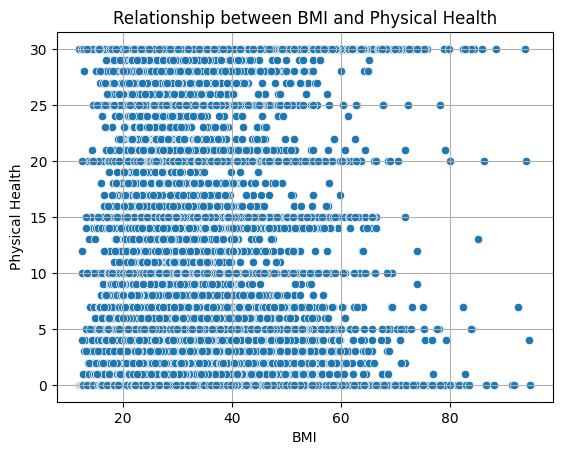

In [6]:
#Scatterplot
sns.scatterplot(x='BMI', y='PhysicalHealth', data=Assignment4)
plt.title('Relationship between BMI and Physical Health')
plt.xlabel('BMI')
plt.ylabel('Physical Health')
plt.grid(True)
plt.show()

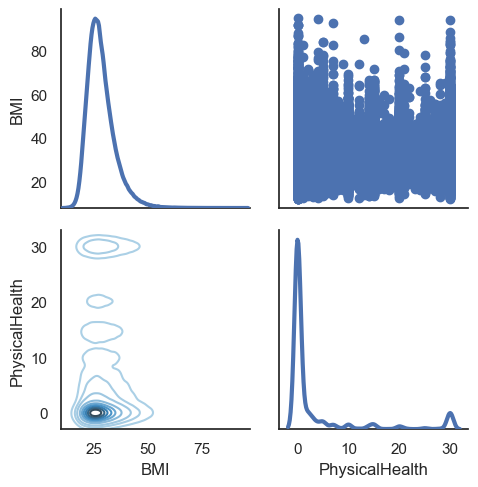

In [7]:
#KDE plot
sns.set(style = "white")
df = Assignment4.loc[:,["BMI","PhysicalHealth"]]
g = sns.PairGrid(df,diag_sharey = False,)
g.map_lower(sns.kdeplot,cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw =3)
plt.show()

In [22]:
# Spearman's correlation
#use scipy.stats
#Null hypothesis for pearson's correlation: The correlation coefficient is not significantly different from zero 
#Measures the rank of the strength of a relationship
#Suited to variables that are not normally distributed
#Is Robust to outliers
correlation_5=scipy.stats.spearmanr(Assignment4['BMI'], Assignment4['PhysicalHealth'])
#print result
print("Spearman's rho using scipystas: ",correlation_5)

Spearman's rho using scipystas:  SignificanceResult(statistic=0.09313356040915576, pvalue=0.0)


In [10]:
# Covariance
#Select the variables
variables=['BMI', 'PhysicalHealth']
cov=Assignment4[variables].cov()
#view result
cov

,BMI,PhysicalHealth
BMI,40.400010,5.548267
PhysicalHealth,5.548267,63.216019


In [20]:
#OR
cov2 = Assignment4['BMI'].cov(Assignment4['PhysicalHealth'])

# Print the result
print("Covariance between BMI and Physical Health:", cov2)

Covariance between BMI and Physical Health: 5.548267267112043


          Explanation of relationship
- The graph shows no trend in the relationship between BMI and Physical Health
- However, the Spearman's correlation shows the strength of the rank of the relationship is weak (rho=0.09, p=0.0)
- Covariance=5.54 indicates very low directional association between the variables

## Q5: Based on the variable “HeartDisease”, which "GenHealth" status  would you advise patients to maintain? [6 MARKS]

- In this scenario, we want patients with no HeartDisease
- So let's pick those GenHeatlh statuses that are linked to no HeartDisease
- So let's use the chisquare test

In [14]:
#Check the GenHealth statuses
print("The unique statuses are: ", Assignment4['GenHealth'].unique) #3 unique statuses

The unique statuses are:  <bound method Series.unique of 0         Very good
1         Very good
2              Fair
3              Good
4         Very good
            ...    
319790         Fair
319791    Very good
319792         Good
319793         Good
319794         Good
Name: GenHealth, Length: 319795, dtype: object>


Text(0.5, 1.0, 'Relationship between General Health and Heart Disease')

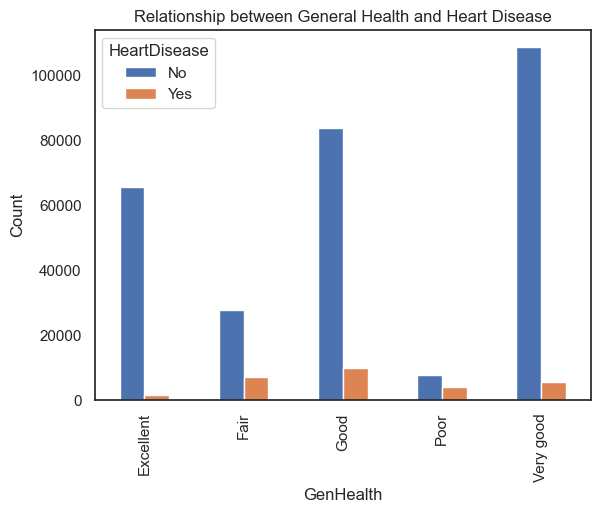

In [15]:
#Visual relationship between GenHealth and HeartDisease
#Generate a contigency table (which is a cross tabulation of string data to numeric)
crosstab = pd.crosstab(index = Assignment4['GenHealth'], columns= Assignment4['HeartDisease'])

#Use contigeny table to generate barplot
%matplotlib inline
crosstab.plot.bar()

#Add title and axes labels to barplot
plt.xlabel('GenHealth')
plt.ylabel('Count')
plt.title('Relationship between General Health and Heart Disease')


- The above graph shows the "Very good" health status has the highest count of no heart disease
- The "Excellent" health status has the least count of heart disease
- Let's check if there's a statistical difference in these groups

In [19]:
#Comparing excellent health and heart disease
#Generate a contigency table for "Excellent" health and Heart Disease
crosstab = pd.crosstab(index = Assignment4['GenHealth'], columns= Assignment4['HeartDisease'])

#Use contigeny table to generate chisquare results
chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(crosstab)
print(f"chi2 statistic:     {chi2_stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:\n",expected)

chi2 statistic:     21542
p-value:            0
degrees of freedom: 4
expected frequencies:
 [[ 61120.62829      5721.37171   ]
 [ 31708.80624775   2968.19375225]
 [ 85157.58044372   7971.41955628]
 [ 10322.71285667    966.28714333]
 [104112.27216185   9745.72783815]]


- null hypothesis ( H0) which states that there is no relationship GenHealth and HeartDisease (if p>0.05, accept the null hypothesis)
- chi2=21542, p-value=0.0
-  This indicates a significant association between GenHealth and HeartDisease
- degrees of freedom=4, chisquare value can be used to find the critical value for a relationship using the chisquare distribution table
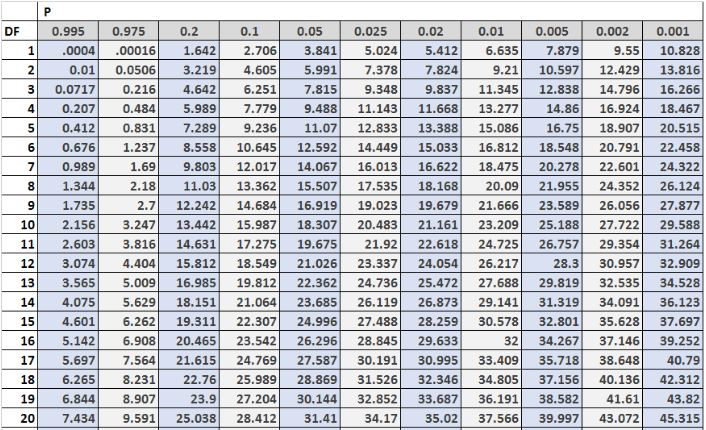
- If the test statistic is greater than the critical value found in the table, then you can reject the null hypothesis of the Chi-Square test and conclude that the results of the test are statistically significant.
- Therefore from the table, the critical value in the table is 9.488 (using df=4, alpha=0.05) and we can reject the null hypothesis
- Expected frequencies: The counts expected if the null hypothesis is true (i.e left-hand shows frequencies of No Heart Disease, right-side = frequencies of Yes to Heart Disease)
- But since the null hypothesis is not true, we use the observed frequencies in the barplot
- Therefore, the "Very good" health status is what patients would be advised to maintain to avoid Heart Disease